# Statistical Quantum AI for a Binary Symetry Model

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Binary symetry model

In [2]:
def model(a_bin: int, p_e: float=0.1) -> float:
    """
    Binary symmetry model
    """
    assert a_bin ==0 or a_bin == 1, 'Input a should be binary (0,1)' 
    if np.random.rand() >= p_e:
        return 1.0-2*a_bin # 0->1., 1->-1.
    else:
        return 2*a_bin-1.0 #0->-1., 1->1.

## For fixed input case: x = 0 

In [11]:
dev = qml.device("qiskit.aer", wires=1, shots=1)

In [10]:
@qml.qnode(dev)
def circuit(x_ph, w_ph):
    """
    x_ph: input value with phase radian representation
    w_ph: weight value with phase radian representation
    """
    qml.RY(x_ph, wires=0)
    qml.RY(w_ph, wires=0)
    return qml.expval(qml.PauliZ(0))

In [4]:
drawer = qml.draw(circuit)
print(drawer(0.0, np.pi))

 0: ──RY(0)──RY(3.14)──┤ ⟨Z⟩ 



In [13]:
def cost(x_ph, y_val, w_ph):
    """
    x_ph: input value with phase radian representation
    y_val: output value with -1 to 1 float representation
    w_ph: weight value with phase radian representation    
    """
    return np.power(y_val - circuit(x_ph, w_ph),2)

dcost = qml.grad(cost, argnum=[2])

In [14]:
w_ph = np.pi
for epoch in range(10):
    x = 0.0
    y_val = model(x, 0)
    x_ph = 0.0 if x == 0 else npa.pi
    print(f"{epoch:2}: cost -> {cost(x_ph, y_val, w_ph):.1f},",
        f"w_ph -> {w_ph:.2f}")
    w_ph -= 0.1*dcost(x_ph, y_val, w_ph)[0]
    w_ph = np.mod(w_ph, 2*np.pi)

 0: cost -> 4.0, w_ph -> 3.14
 1: cost -> 4.0, w_ph -> 3.54
 2: cost -> 4.0, w_ph -> 3.94
 3: cost -> 4.0, w_ph -> 3.94
 4: cost -> 4.0, w_ph -> 3.94
 5: cost -> 0.0, w_ph -> 4.34
 6: cost -> 4.0, w_ph -> 4.74
 7: cost -> 0.0, w_ph -> 5.14
 8: cost -> 0.0, w_ph -> 5.14
 9: cost -> 0.0, w_ph -> 5.14


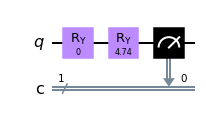

In [9]:
dev._circuit.draw(output="mpl")

## Varible input case: x = 0 or 1

In [15]:
def train(model_e_rate=0.0, N_epoch=100, learning_rate=0.1, w_ph=np.pi):
    x_a = np.random.randint(2, size=N_epoch)
    buff = {"cost": [], "w_ph": []}
    for epoch in range(N_epoch):
        x = x_a[epoch]
        y_val = model(x, model_e_rate)
        x_ph = 0.0 if x == 0 else np.pi
        w_ph -= learning_rate*dcost(x_ph, y_val, w_ph)[0]
        w_ph = np.mod(w_ph, 2*np.pi)
        J = cost(x_ph, y_val, w_ph)
        buff["cost"].append(J)
        buff["w_ph"].append(w_ph)
    return buff

In [16]:
def plot(buff):
    N_epoch = len(buff["cost"])
    plt.figure(figsize=[12, 5])
    plt.subplot(1,2,1)
    plt.plot(range(N_epoch), buff["cost"])
    plt.title("Trace of Cost Variation")
    plt.xlabel("Epoch")
    plt.ylabel("J")
    plt.subplot(1,2,2)
    plt.plot(range(N_epoch), buff["w_ph"])
    plt.title("Trace of Weight Variation")
    plt.xlabel("Epoch")
    plt.ylabel("w_ph")

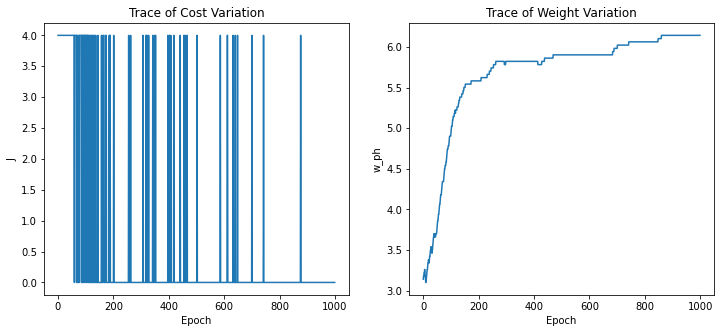

In [17]:
buff = train(model_e_rate=0.0, N_epoch=1000, learning_rate=0.01)
plot(buff)

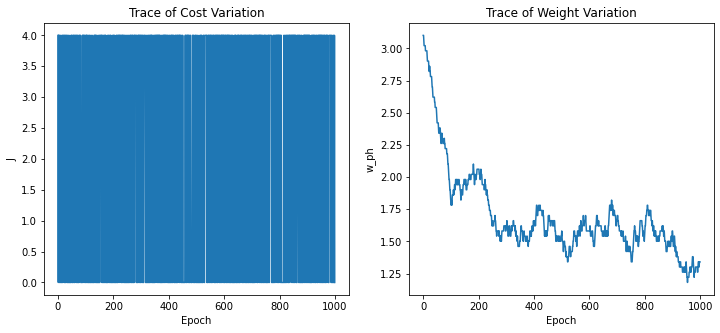

In [18]:
buff = train(model_e_rate=0.5, N_epoch=1000, learning_rate=0.01)
plot(buff)